# 4. Evaluating a model

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Across the board, the main idea of evaluating a model is to **compare the model's predictions to what they should've ideally been** (the truth labels).

Scikit-Learn implements 3 different methods of evaluating models.

1. The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The `scoring` parameter. This parameter can be passed to methods such as [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions available in [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

### 4.1 General model evaluation with `score()`

If we bring down the code from our previous classification problem (building a classifier to predict whether or not someone has heart disease based on their medical records).

We can see the `score()` method come into play.

In [4]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

heart_disease = pd.read_csv('../datasets/heart-disease.csv')

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

Once the model has been fit on the training data (`X_train`, `y_train`), we can call the `score()` method on it and evaluate our model on the test data, data the model has never seen before (`X_test`, `y_test`).

In [5]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

Each model in Scikit-Learn implements a default metric for `score()` which is suitable for the problem.

For example:
* Classifier models generally use [`metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the default `score()` metric.
* Regression models generally use [`metrics.r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) as the default `score()` metric.
* There many more [classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) and [regression](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) specific metrics implemented in `sklearn.metrics`.

Because `clf` is an instance of `RandomForestClassifier`, the `score()` method uses mean accuracy as its score method.

You can find this by pressing **SHIFT + TAB** (inside a Jupyter Notebook, may be different elsewhere) within the brackets of `score()` when called on a model instance.

Behind the scenes, `score()` makes predictions on `X_test` using the trained model and then compares those predictions to the actual labels `y_test`.

A classification model which predicts everything 100% correct would receive an accuracy score of 1.0 (or 100%).

Our model doesn't get everything correct, but at ~85% accuracy (0.85 * 100), it's still far better than guessing.

Let's do the same but with the regression code from above.

In [7]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

housing_df = pd.read_csv('../datasets/housing_df1.csv')
# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("median_house_value", axis=1)
y = housing_df["median_house_value"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

Due to the consistent design of the Scikit-Learn library, we can call the same `score()` method on `model`.

In [8]:
# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8229631495986571

Here, `model` is an instance of [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). 

And since it's a regression model, the default metric built into `score()` is the coefficient of determination or R^2 (pronounced R-sqaured).

Remember, you can find this by pressing **SHIFT + TAB** within the brackets of `score()` when called on a model instance.

The best possible value here is 1.0, this means the model predicts the target regression values exactly.

Calling the `score()` method on any model instance and passing it test data is a good quick way to see how your model is going.

However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

### 4.2 Evaluating your models using the `scoring` parameter 

The next step up from using `score()` is to use a custom `scoring` parameter with [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

As you may have guessed, the `scoring` parameter you set will be different depending on the problem you're working on.

We'll see some specific examples of different parameters in a moment but first let's check out `cross_val_score()`.

To do so, we'll copy the heart disease classification code from above and then add another line at the top.

In [9]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

Using `cross_val_score()` is slightly different to `score()`. 

Let's see a code example first and then we'll go through the details.

In [10]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

In [11]:
# Using cross_val_score()
cross_val_score(clf, X, y, cv=5) # cv = number of splits to test (5 by default)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

What's happening here?

The first difference you might notice is `cross_val_score()` returns an array where as `score()` only returns a single number.

`cross_val_score()` returns an array because of a parameter called `cv`, which stands for cross-validation.

When `cv` isn't set, `cross_val_score()` will return an array of 5 numbers by default (`cv=None` is the same as setting `cv=5`).

Remember, you can see the parameters of a function using **SHIFT + TAB** (inside a Jupyter Notebook) from within the brackets.

But wait, you might be thinking, what even is cross-validation?

A visual might be able to help.

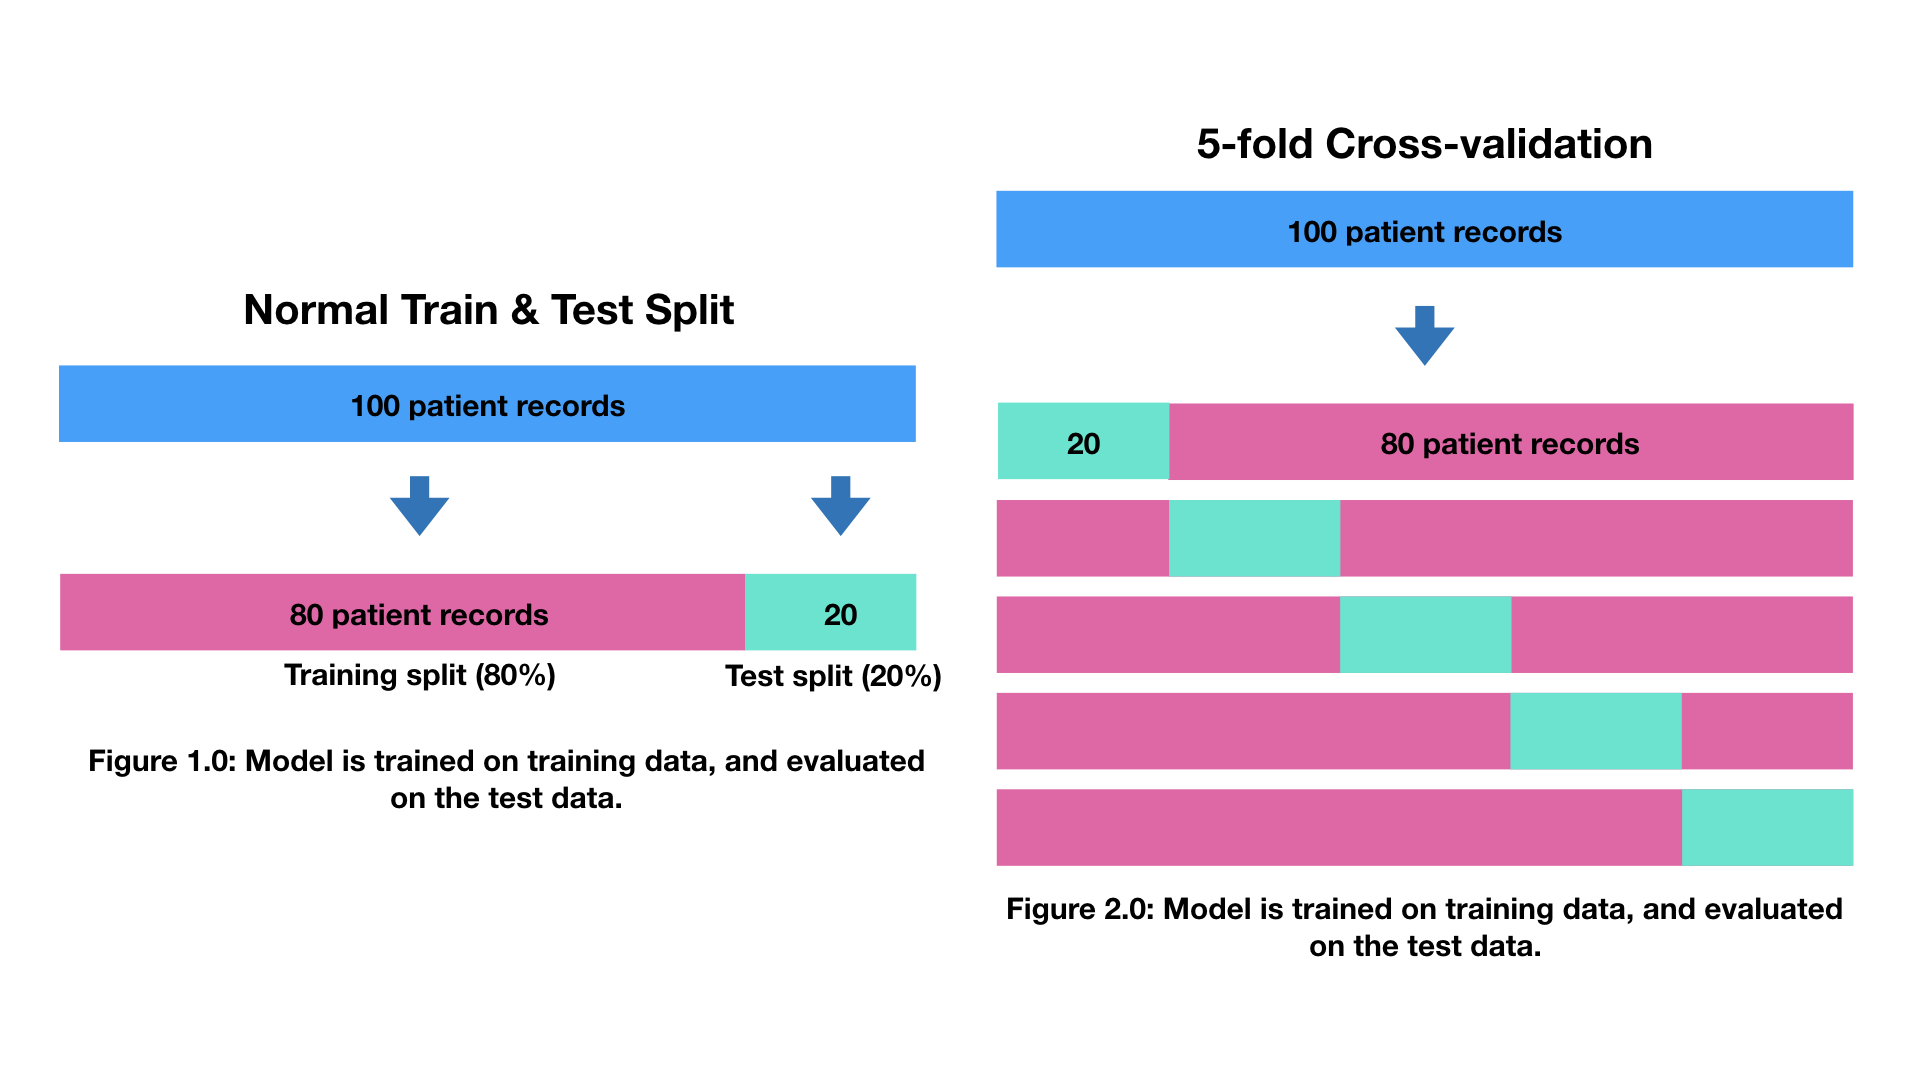

We've dealt with Figure 1.0 before using `score(X_test, y_test)`. 

But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset. 

For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly. 

The same goes for the reverse.

Figure 2.0 shows 5-fold cross-validation, a method which tries to provide a solution to:

1. Not training on all the data (always keeping training and test sets separate).
2. Avoiding getting lucky scores on single splits of the data.

Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. 

On a different split each time, returning a score for each.

Why 5-fold?

The actual name of this setup K-fold cross-validation. Where K is an abitrary number. We've used 5 because it looks nice visually, and it is the default value in [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

Figure 2.0 is what happens when we run the following.

In [12]:
# 5-fold cross-validation
cross_val_score(clf, X, y, cv=5) # cv is equivalent to K

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

Since we set `cv=5` (5-fold cross-validation), we get back 5 different scores instead of 1.

Taking the mean of this array gives us a more in-depth idea of how our model is performing by converting the 5 scores into one.

In [13]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

Notice, the average `cross_val_score()` is slightly lower than single value returned by `score()`.

In this case, if you were asked to report the accuracy of your model, even though it's lower, you'd prefer the cross-validated metric over the non-cross-validated metric.

Wait?

We haven't used the `scoring` parameter at all.

By default, it's set to `None`.

In [14]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring value, this can be set to other scoring metrics

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

> **Note:** If you notice different scores each time you call `cross_val_score`, this is because each data split is random every time. So the model may achieve higher/lower scores on different splits of the data. To get reproducible scores, you can set the random seed.

When `scoring` is set to `None` (by default), it uses the same metric as `score()` for whatever model is passed to `cross_val_score()`.

In this case, our model is `clf` which is an instance of `RandomForestClassifier` which uses mean accuracy as the default `score()` metric.

You can change the evaluation score `cross_val_score()` uses by changing the `scoring` parameter.

And as you might have guessed, different problems call for different evaluation scores.

The [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) outlines a vast range of evaluation metrics for different problems but let's have a look at a few.